# EDA And Cleaning

### Intro

Before we dive on in, let's remember from our readme of what our ultimate goal is. For this project I have designed a scenario where I have been hired by a real estate company, Rise Realty, to assist in maximizing profits. Rise is a moderately sized brokerage with roughly 10-12 agents and would like data supported insight on how to best maximize profit potential. While Rise does have a lengthy database of potential clients, all they have is different metrics on the property without a sale price (the kaggle test set). They recognize they do not have endless resources available so have contacted me with hopes of receiving recommendations on what areas, Neighborhoods specifically, should their agents and office focus their energy towards.

### 1. Read the Data Dictionary

Before embarking on our data journey, let's begin by familiarizing outselves with the provided Data Dictionary 
(Data Dictionary can be found here: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). This a critical first step as it will be able to give full laymen explanations for each column and what they signifiy/represent. As we will see from our initial 'data read' we will encounter a datast that contains an extensive amount of columns along with columns that don't have the most obvious/intuitive column names. For cases like these, it is particularly helpful and will give us a thorough understanding of what we're looking at. 

### 2. Import All Necessary Libraries

Now that we've got an idea of what our data should look like and represents, let's prepare ourselves to read in the data and import any other libraries that we think we will need for the entire analysis. (we can always update our imports along the way, but let's start with the usual suspects)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### 3. Read the Data

Our initial data sets have been divided into a training and test set. For this project our training data is set up with the actual Sale Price, and the the test data has the same categories except it's missing the Sale Price. The objective will be to create our model and fit it from the training set, and then using our model to predict the sale price for the test data set.

But thinking in terms of our project we are going to treat the train data (one with the sale price included) as our dataset that we, as real estate consultants, have gathered from Ames to build our model with. And the test set (test from kaggle) will be treated as the clients potential sale data given to us via Rise Realty (without price). Let's use pd.read to take a look at our data:

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

Let's look at the top 5 columns for train:

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


...now do the same for test

In [4]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### 4. Determine/Interpret Missing Data

Now that we've got our data sets ready to work with, it's always best practice to determine if there are any null values/outliers and attempt to interpret them in ways that will assist us our analysis. It's important to be able to make judgements about our missing or null data in order to properly represent the data, and effectively our future predictions, as they will have potential effects. 

Best way to check for null values is to use .isnull() along with .sum() to provide us with a succinct easy to read representation. Let's do this for both train and test set and see the results:

(With so many columns it can also be helpful to change our panda options to view the full result:

In [5]:
pd.set_option('max_colwidth', 256)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [6]:
train.isnull().sum().sort_values(ascending = False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Cond         114
Garage Qual         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Bsmt Unf SF           1
BsmtFin SF 2          1
Total Bsmt SF         1
BsmtFin SF 1          1
Overall Cond          0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
Roof Style            0
Year Remod/Add        0
Year Built            0
SalePrice             0
Overall Qual          0
Land Contour          0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Area              0
Street                0
Lot Shape       

In [7]:
test.isnull().sum().sort_values(ascending = False)

Pool QC            874
Misc Feature       837
Alley              820
Fence              706
Fireplace Qu       422
Lot Frontage       160
Garage Cond         45
Garage Qual         45
Garage Yr Blt       45
Garage Finish       45
Garage Type         44
Bsmt Exposure       25
BsmtFin Type 1      25
Bsmt Qual           25
BsmtFin Type 2      25
Bsmt Cond           25
Mas Vnr Area         1
Mas Vnr Type         1
Electrical           1
Overall Cond         0
Exter Qual           0
Exter Cond           0
Foundation           0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
Roof Style           0
Year Remod/Add       0
Year Built           0
Sale Type            0
Overall Qual         0
House Style          0
Bldg Type            0
Condition 2          0
Condition 1          0
Land Slope           0
Lot Config           0
Utilities            0
Land Contour         0
Lot Shape            0
Street               0
Lot Area             0
MS Zoning            0
MS SubClass

As we can see, there initially seems to be a fair amount of Nulls for some our of columns. But is this truly the case? A quick check with our data dictionary uncovers that for some of the categorical columns, such as Pool QC (Pool Quality), a possible response is NA: No Pool. Instead of interpreting this as simply unrecorded data, it's more accurate to say that the house simply just has No Pool. We should go through all the columns listing null values and cross reference with our data dictionary to make a judgement of whether or not the data is simply missing or telling us something speicifc (such as NA: No Pool). Since we know that for the categorical columns, NA is acceptable data and doesn't indicate null values, we should focus our Null cleanup efforts on the columns with discrete values where NAs can't indicate something categorical. A good way to do this is use ._get_numeric_data()_ to separate out and perform the same .isnull().sum() 

In [8]:
train._get_numeric_data().isnull().sum().sort_values(ascending = False)

Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Area          1
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Low Qual Fin SF      0
MS SubClass          0
PID                  0
1st Flr SF           0
2nd Flr SF           0
SalePrice            0
Gr Liv Area          0
Open Porch SF        0
Mo Sold              0
Misc Val             0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Wood Deck SF         0
Yr Sold              0
Fireplaces           0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Id                   0
dtype: int64

In [9]:
test._get_numeric_data().isnull().sum().sort_values(ascending = False)

Lot Frontage       160
Garage Yr Blt       45
Mas Vnr Area         1
Yr Sold              0
2nd Flr SF           0
1st Flr SF           0
Total Bsmt SF        0
Bsmt Unf SF          0
BsmtFin SF 2         0
BsmtFin SF 1         0
Year Remod/Add       0
Gr Liv Area          0
Year Built           0
Overall Cond         0
Overall Qual         0
Lot Area             0
MS SubClass          0
PID                  0
Low Qual Fin SF      0
Bsmt Full Bath       0
Mo Sold              0
Bsmt Half Bath       0
Misc Val             0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Open Porch SF        0
Wood Deck SF         0
Garage Area          0
Garage Cars          0
Fireplaces           0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Id                   0
dtype: int64

While there are still NAs recorded for our numerical columns, it is certainly much less than what we initially saw. For these NAs we will want to figure out how to handle them. Simply dropping may present us with challenges of underrepresenting our data or potential issues when being handed new data to predict, so another way we could work around this is replace our nulls with the column average.  

Let's see if we draw any conclusions from the above. For example we can see that all the Garage columns have the same Null values, and if we recall from our data dictionary an NA indicates that their is no garage, so it would be safe to assume that the NAs in the discrete garage columns such as "Garage Yr Blt" would intuitively be NA since if there's no garage there obviously can't be a year that it was built. This will be something to keep in mind during our data cleaning stages.

### 5. Datatypes, Categorical Columns, And Interpreting Them

It's always helpful to also check the datatypes of each column to understand what the column holds and allow us to make any decisions on whether or not we will have to convert any of them (ex: dummify appropriate categorical columns, convert % str columns to decimal floats etc...)

Let's take a look using .dtypes:

In [10]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

If we compare these results to our data dictionary we find that everything seems to be how expected. But the critical step for our feature selection will be to make a judgement on whether the column is best represented as categorical or continuous. An example of when we might want to dummify these discrete columns would be if there was a column such as Gender with values 1 = male, 2 = female. We can see that these don't really create a linear relationship so would have to be dummified in order to create their own corresponding linear relation and coefficient. An example in our set would be MS SubClass where it's sorted by numerical codes. We know that we'd have to dummify this because if we didn't our relationship would create an awkward, ineffective coefficient for that feature (the interpretation of increasing of "unit" wouldn't work because units wouldn't be common). But for instances like 'Overall Qual', while each number indicates a categorical "level of quality" we can say that it would make sense to keep this column as continuous since the units translate to a level of scale. Each increasing "unit" is an increase in quality and will affect the sale price accordingly (we can still have a sensible coefficient for this column). 

Using this knowledge we know that since Rise Realty is interested in which Neighborhoods to focus on, so we will want to eventually dummify this column in order to incorporate it into our model.

### 6. Outliers

Let's take another preliminary look at our data and see if we can find any outliers and then see if we can deduce any explainable reasons for its occurences or make a case for removing them if necessary. For some cases, we may not have an explanation and the outlier simply just occurred, in this case we will want to leave it for the sake of data integrity. The easiest way to get a look at ourliers is through our .describe() method:

In [11]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Since determing price is the first step towards our ultimate goal, let's make sure that there are no outliers within that column that will make throw our model off:

In [12]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

Everything looks within reason, we do see an awfully high max sale price, but certainly something not out of the realm of possibilities (could have been a mansion for sale!). But if we aren't convinced we could inspect that specific item or so a sort values to see if other sale prices are within the neighborhood as well

In [13]:
#Enough neighbors to support not being an outlier!
train['SalePrice'].sort_values(ascending = False)

1671    611657
1964    591587
1692    584500
1796    582933
151     556581
         ...  
1518     35311
1292     35000
1309     34900
183      13100
1628     12789
Name: SalePrice, Length: 2051, dtype: int64

In [14]:
#A modern, high quality house with high sq ftage and a lot of land as well, makes sense it would sell for so high!
train[train['SalePrice'] == 611657]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1671,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,611657


A great way to check for outliers visually is through a boxplot. So let's give that a try with our 'SalePrice' columns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


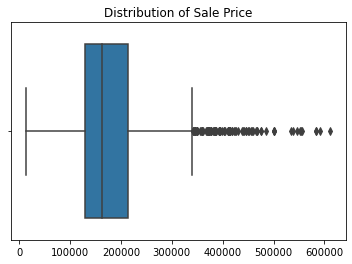

In [15]:
#Boxplot:
sns.boxplot(train['SalePrice'].values)
plt.title('Distribution of Sale Price');

Huh, well it looks like we do have outliers afterall. Should we remove these? In this case we would not want to remove the outliers. The reason being is that with something as complex as sale price there will be a number of contributing factors at play, especially with our problem set of determining the "most valuable neighborhood". If we remove the outliers, we no longer represent the sale prices of the higher end neighborhoods and will make our data less meaningul when trying to predict the prices for those homes. 

### 7. Address And Impute Null Values

Let's start with our numerical nulls, specifically with the most occurring: 'Lot Frontage' w/ 330 & 160 nulls (train, test respectively). Let's first look at the unique values for this possible feature:

In [16]:
train['Lot Frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

One technique that we can use for our analysis is to simply impute the column means into these missing NaN values. Since we do not know enough about the details of these NaN values and can't draw any conclusions from our data dictionary, let's perfrom this imputation using the .fillna() method for this column. (don't forget to perform the same on the test set as well!)

In [17]:
train['Lot Frontage'].fillna(np.mean(train['Lot Frontage']), inplace = True)

In [18]:
#let's check our nulls again:
train['Lot Frontage'].isnull().sum()

0

In [19]:
#Looks like it worked! Now same for the test set:
test['Lot Frontage'].fillna(np.mean(test['Lot Frontage']), inplace = True)

Now let's move on to the next column. For "Garage Yr Blt" we saw from earlier that these garages may not actually exist! So what should we put in for a value? We can't leave as null, and don't want to skew the column immensely by imputing a 0, so the next best thing would be to use the average again.

In [20]:
#for train nulls
train['Garage Yr Blt'].fillna(np.mean(train['Garage Yr Blt']), inplace = True)
train['Mas Vnr Area'].fillna(np.mean(train['Mas Vnr Area']), inplace = True)
train['Bsmt Half Bath'].fillna(np.mean(train['Bsmt Half Bath']), inplace = True)
train['Bsmt Full Bath'].fillna(np.mean(train['Bsmt Full Bath']), inplace = True)
train['Garage Cars'].fillna(np.mean(train['Garage Cars']), inplace = True)
train['BsmtFin SF 1'].fillna(np.mean(train['BsmtFin SF 1']), inplace = True)
train['BsmtFin SF 2'].fillna(np.mean(train['BsmtFin SF 2']), inplace = True)
train['Bsmt Unf SF'].fillna(np.mean(train['Bsmt Unf SF']), inplace = True)
train['Total Bsmt SF'].fillna(np.mean(train['Total Bsmt SF']), inplace = True)
train['Garage Area'].fillna(np.mean(train['Garage Area']), inplace = True)

In [21]:
#for test nulls
test['Garage Yr Blt'].fillna(np.mean(test['Garage Yr Blt']), inplace = True)
test['Mas Vnr Area'].fillna(np.mean(test['Mas Vnr Area']), inplace = True)
test['Bsmt Half Bath'].fillna(np.mean(test['Bsmt Half Bath']), inplace = True)
test['Bsmt Full Bath'].fillna(np.mean(test['Bsmt Full Bath']), inplace = True)
test['Garage Cars'].fillna(np.mean(test['Garage Cars']), inplace = True)
test['BsmtFin SF 1'].fillna(np.mean(test['BsmtFin SF 1']), inplace = True)
test['BsmtFin SF 2'].fillna(np.mean(test['BsmtFin SF 2']), inplace = True)
test['Bsmt Unf SF'].fillna(np.mean(test['Bsmt Unf SF']), inplace = True)
test['Total Bsmt SF'].fillna(np.mean(test['Total Bsmt SF']), inplace = True)
test['Garage Area'].fillna(np.mean(test['Garage Area']), inplace = True)

Now let's double check to make that there are no null numerical values remaing. Let's recall our early usuage of .get_numeric 

In [22]:
#no nulls for train numeric!
train._get_numeric_data().isnull().sum().sum()

0

In [23]:
#no nulls for test numeric either
test._get_numeric_data().isnull().sum().sum()

0

Great work, now our numerical columns are all set to use for our analysis. But let's not forget about the categorical columns. Luckily this can be all done in one step because as we remember from our data dictionary discoveries, the null values for these columns in fact represent another category: None or Not Present (i.e. NA for Garage = No Garage). This will be important as we want it represented in our data and models as they may ultimately have an effect on our sale price predictions. **Note: this is easier to do after the numerical fills, if done before it will fill the numerical nulls to 'None' as well**

In [24]:
train.fillna('None', inplace = True)

In [25]:
test.fillna('None', inplace = True)

In [26]:
#let's check for nulls again:
train.isnull().sum().sum()

0

In [27]:
#and for test:
test.isnull().sum().sum()

0

Finally our data is clean and rid of any null or erroneous data. Now we can move onto the Preprocessing and Feature Engineering stage. Open up '02_Preprocessing_and_Feature_Engineering.ipynb' found in the 'code' folder of the repo to continue on!